In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [2]:
import numpy as np
import plotly.graph_objects as go
import common_plots

# Inference with Gaussians
A Gaussian is defined by a mean $\mu$ and covariance $\Sigma$. Say your input vector $x$ can be partitioned 
$x=\left(
\begin{matrix}
x_{a} \\
x_{b}
\end{matrix}
\right)$, the mean can be formulated as 
$\mu=\left(
\begin{matrix}
\mu_{a} \\
\mu_{b}
\end{matrix}
\right)$ and the covariance is the block matrix 
$\Sigma=\left[
\begin{matrix}
\Sigma_{aa} & \Sigma_{ab} \\
\Sigma_{ba} & \Sigma_{bb} 
\end{matrix}
\right]$ <br>
Then there are several importance statements:

### Marginalization
The marginal of a Gaussian is simply the gaussian without the variables being marginalized out. So, if you are marginalizing the $b$ variables, the mean is $\mu_a$ and the covariance is $\Sigma_{aa}$
This is demonstrated below with a 2d matrix. <br>
**2d example matrix:**

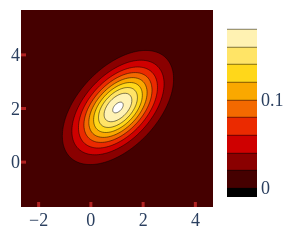

In [3]:
mean = np.array([1,2])
cov = np.array([[1,0.5],[0.5,1]])
full_gaussian_fig = common_plots.plot_2D_Gaussian_Contour(mean,cov)
full_gaussian_fig.show(renderer="png",width=300,height=240)

**maginalizing out the second variable**

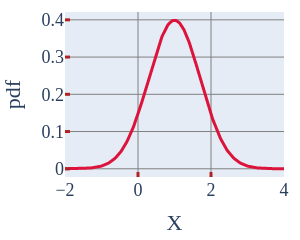

In [4]:
marginal_mean = mean[0]
marginal_cov = cov[0,0]
marginal_gaussian_fig = common_plots.plot_1D_Gaussian(marginal_mean,marginal_cov)
marginal_gaussian_fig.show(renderer="png",width=300,height=240)

### Conditioning
The conditional $p(x_a|x_b)$ is given by the mean $\mu_{a|b}$ and covariance $\Sigma_{a|b}$ where:
$$\mu_{a|b}=\mu_a+\Sigma_{ab}\Sigma_{bb}^{-1}(x_b-\mu_b)$$
$$\Sigma_{a|b}=\Sigma_{aa}-\Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ba}$$

**2d example (showing instead with histogram of samples for fun)**

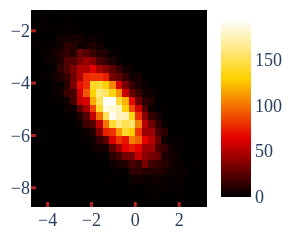

In [5]:
mean = np.array([-1,-5])
cov = np.array([[1,-0.7],[-0.7,1]])
samples = np.random.multivariate_normal(mean,cov,10000)
fig = common_plots.plot_2D_Hist(samples,20)
fig.show(renderer="png",width=300,height=240)

Conditioning on $x_2=-7$ should expect the mean of the resulting gaussian to be just below $0$

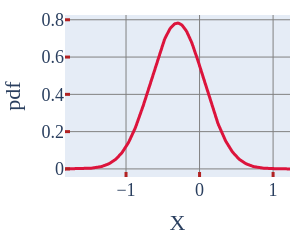

In [6]:
x_b = -6
cov_aa = np.atleast_2d(cov[0,0])
cov_ab = np.atleast_2d(cov[0,1])
cov_bb = np.atleast_2d(cov[1,1])
cov_ba = np.atleast_2d(cov[1,0])
conditional_mean = mean[0]+cov_ab.dot(np.linalg.inv(cov_bb)).dot(x_b-mean[1])
conditional_cov = cov_aa-cov_ab.dot(np.linalg.inv(cov_bb)).dot(cov_ba)
conditional_gaussian_fig = common_plots.plot_1D_Gaussian(conditional_mean[0][0],conditional_cov[0][0])
conditional_gaussian_fig.show(renderer="png",width=300,height=240)